In [2]:
print ("Chess Analysis")

Chess Analysis


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read data
games = pd.read_csv('games.csv')

In [102]:
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [103]:
# drop not needed columns
# drop id
games.drop(['id'], axis = 1, inplace = True)

# drop created_at
games.drop(['created_at'], axis = 1, inplace = True)

# drop last_move_at
games.drop(['last_move_at'], axis = 1, inplace = True)

# drop increment_code
games.drop(['increment_code'], axis = 1, inplace = True)

# drop white_id
games.drop(['white_id'], axis = 1, inplace = True)

# drop black_id
games.drop(['black_id'], axis = 1, inplace = True)

# drop moves
games.drop(['moves'], axis = 1, inplace = True)

# print new data set
games.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,1500,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,1523,1469,C41,Philidor Defense,5


In [104]:
# check for null values
games.isnull().sum()

rated             0
turns             0
victory_status    0
winner            0
white_rating      0
black_rating      0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [105]:
# info about data in data set
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           20058 non-null  bool  
 1   turns           20058 non-null  int64 
 2   victory_status  20058 non-null  object
 3   winner          20058 non-null  object
 4   white_rating    20058 non-null  int64 
 5   black_rating    20058 non-null  int64 
 6   opening_eco     20058 non-null  object
 7   opening_name    20058 non-null  object
 8   opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 1.2+ MB


In [106]:
# general descriptive statistics
games.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [107]:
# unique opening names played in data set
opening_name_played = games['opening_name'].nunique()
print ("individual openings by name played:", opening_name_played)
print ("")

# times of unique openings by name played in data set
opening_name_count = games['opening_name'].value_counts()
print ("openings by name:")
print (opening_name_count)
print ("")

# openings by name played at least 100 times (Top 41)
opening_name_counts[0:40]

individual openings by name played: 1477

openings by name:
Van't Kruijs Opening                                               368
Sicilian Defense                                                   358
Sicilian Defense: Bowdler Attack                                   296
French Defense: Knight Variation                                   271
Scotch Game                                                        271
                                                                  ... 
Caro-Kann Defense: Karpov Variation |  Tiviakov-Fischer Attack       1
English Opening: Mikenas-Carls Variation                             1
Nimzo-Indian Defense: Classical |  Noa Variation |  5.cxd5 exd5      1
Bishop's Opening: Philidor Variation                                 1
King's Gambit |  Falkbeer Countergambit |  Miles Gambit              1
Name: opening_name, Length: 1477, dtype: int64



Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Caro-Kann Defense                                199
Philidor Defense #3                              198
Philidor Defense #2                              193
Indian Game                                      181
Italian Game: Anti-Fried Liver Defense           180
Four Knights Game: Italian Variation             176
Modern Defense                                   174
Owen Defense                                     168
King's Pawn Game: Wayward Queen Attack        

In [108]:
# top 10 openings
n = 10
top_10 = games['opening_name'].value_counts()[:n].index.tolist()
top_10

["Van't Kruijs Opening",
 'Sicilian Defense',
 'Sicilian Defense: Bowdler Attack',
 'French Defense: Knight Variation',
 'Scotch Game',
 'Scandinavian Defense: Mieses-Kotroc Variation',
 "Queen's Pawn Game: Mason Attack",
 "Queen's Pawn Game: Chigorin Variation",
 'Scandinavian Defense',
 'Horwitz Defense']

In [109]:
# add column with opening name frequency
games['opening_frequency'] = games['opening_name'].map(games['opening_name'].value_counts())
games

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,opening_frequency
0,False,13,outoftime,white,1500,1191,D10,Slav Defense: Exchange Variation,5,19
1,True,16,resign,black,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5
2,True,61,mate,white,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,154
3,True,61,mate,white,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,114
4,True,95,mate,white,1523,1469,C41,Philidor Defense,5,135
...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,1691,1220,A80,Dutch Defense,2,48
20054,True,82,mate,black,1233,1196,A41,Queen's Pawn,2,129
20055,True,35,mate,white,1219,1286,D00,Queen's Pawn Game: Mason Attack,3,232
20056,True,109,resign,white,1360,1227,B07,Pirc Defense,4,19


In [59]:
# top 10 openings with count
top_10_counts = opening_name_counts[0:10]
top_10_counts

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: opening_name, dtype: int64

In [61]:
# mean rating of white - player playing the opening
games.white_rating.mean()

1596.6318675840064

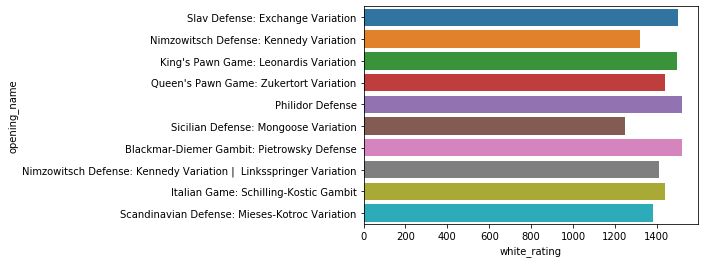

In [110]:
# rating of opening player vs opening played of first 10 games
sns.barplot(x = games.white_rating, y = games.opening_name[0:10], data = games)
#sns.barplot(x = games.white_rating, y = top_10, data = games)

In [69]:
# winner
winner = games['winner'].value_counts()
winner

white    10001
black     9107
draw       950
Name: winner, dtype: int64

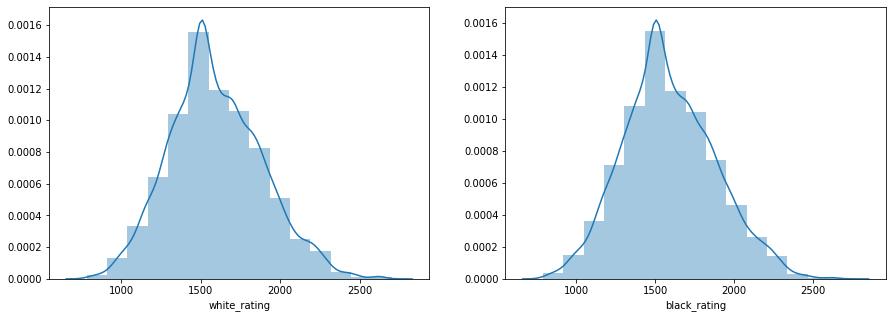

In [70]:
# ratings of white and black players - no difference
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.distplot(games["white_rating"], bins = 15, ax = ax[0])
sns.distplot(games["black_rating"], bins = 15, ax = ax[1])

In [111]:
# grouping
games.groupby(['opening_name'])
games

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,opening_frequency
0,False,13,outoftime,white,1500,1191,D10,Slav Defense: Exchange Variation,5,19
1,True,16,resign,black,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5
2,True,61,mate,white,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,154
3,True,61,mate,white,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,114
4,True,95,mate,white,1523,1469,C41,Philidor Defense,5,135
...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,1691,1220,A80,Dutch Defense,2,48
20054,True,82,mate,black,1233,1196,A41,Queen's Pawn,2,129
20055,True,35,mate,white,1219,1286,D00,Queen's Pawn Game: Mason Attack,3,232
20056,True,109,resign,white,1360,1227,B07,Pirc Defense,4,19


In [ ]:
# grouping
#dataframe, sorted by opening_frequency
#opening_name, opening_frequency, mean of white_rating, probable winner, mean of turns, mean of opening_ply